In [1]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading CSV
features = pd.read_csv("../Resources/features.csv")
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [3]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [4]:
features['DateTime']=[dt.strptime(x,'%Y-%m-%d') for x in list(features['Date'])]
features['DateTime'].head()

0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: DateTime, dtype: datetime64[ns]

In [5]:
features = features.iloc[:, list(range(5)) + list(range(10,13))]
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,Unemployment,IsHoliday,DateTime
0,1,2010-02-05,42.31,2.572,NaN,8.106,False,2010-02-05
1,1,2010-02-12,38.51,2.548,NaN,8.106,True,2010-02-12
2,1,2010-02-19,39.93,2.514,NaN,8.106,False,2010-02-19
3,1,2010-02-26,46.63,2.561,NaN,8.106,False,2010-02-26
4,1,2010-03-05,46.50,2.625,NaN,8.106,False,2010-03-05


In [6]:
features['DateTime'] = [dt.strptime(x, '%Y-%m-%d') for x in list(features['Date'])]
weekNo=features.reset_index()

In [7]:
weekNo = [(x - features['DateTime'][0]) for x in list(features['DateTime'])]

In [8]:
features['Week'] = [np.timedelta64(x, 'D').astype(int)/7 for x in weekNo]
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,Unemployment,IsHoliday,DateTime,Week
0,1,2010-02-05,42.31,2.572,NaN,8.106,False,2010-02-05,0.0
1,1,2010-02-12,38.51,2.548,NaN,8.106,True,2010-02-12,1.0
2,1,2010-02-19,39.93,2.514,NaN,8.106,False,2010-02-19,2.0
3,1,2010-02-26,46.63,2.561,NaN,8.106,False,2010-02-26,3.0
4,1,2010-03-05,46.50,2.625,NaN,8.106,False,2010-03-05,4.0


In [9]:
from sklearn.model_selection import train_test_split
train_WM, test_WM = train_test_split(features, test_size=0.3,random_state=42)

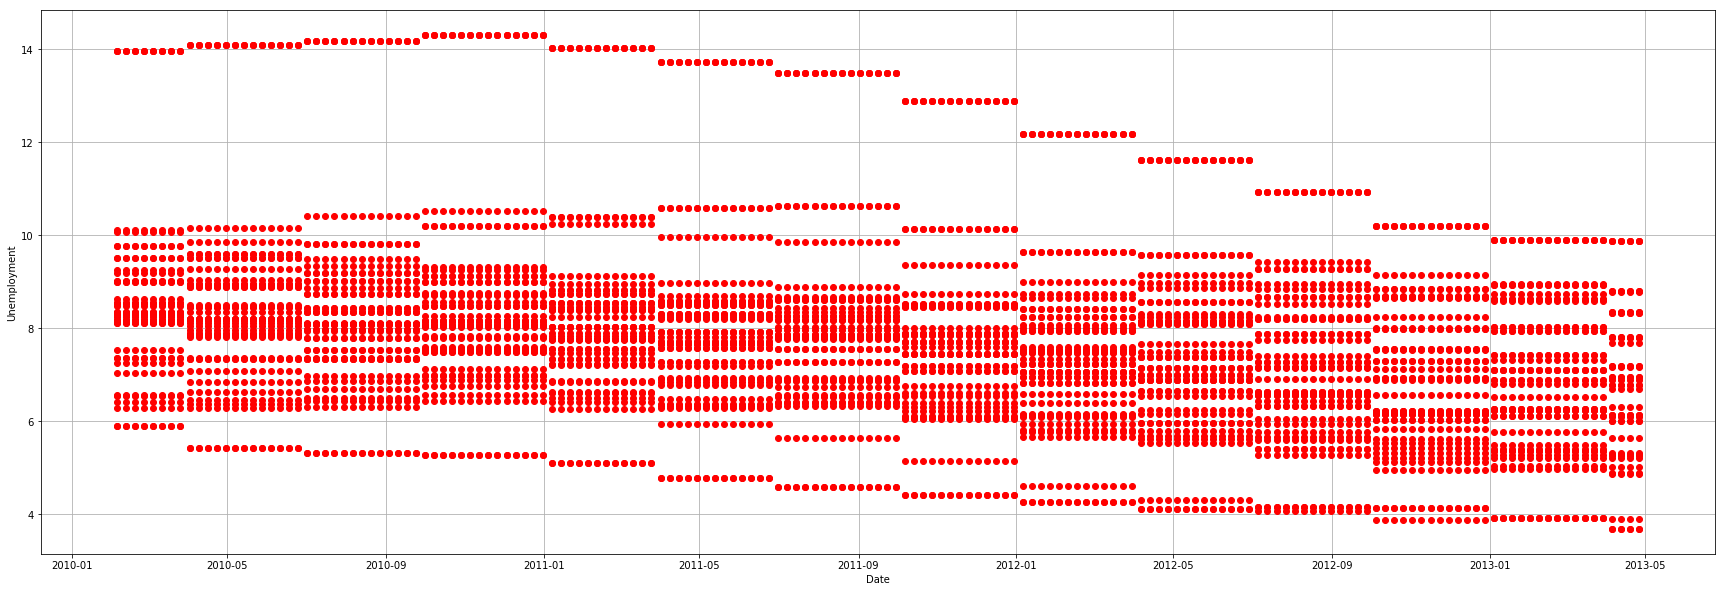

In [13]:
plt.plot(features.DateTime, features.Unemployment, 'ro')
plt.rcParams["figure.figsize"]=(30,10)
plt.ylabel("Unemployment")
plt.xlabel("Date")
plt.grid()
plt.show()

In [14]:
features.IsHoliday = features.IsHoliday.astype(int)

In [15]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,Unemployment,IsHoliday,DateTime,Week
0,1,2010-02-05,42.31,2.572,NaN,8.106,0,2010-02-05,0.0
1,1,2010-02-12,38.51,2.548,NaN,8.106,1,2010-02-12,1.0
2,1,2010-02-19,39.93,2.514,NaN,8.106,0,2010-02-19,2.0
3,1,2010-02-26,46.63,2.561,NaN,8.106,0,2010-02-26,3.0
4,1,2010-03-05,46.50,2.625,NaN,8.106,0,2010-03-05,4.0
5,1,2010-03-12,57.79,2.667,NaN,8.106,0,2010-03-12,5.0
6,1,2010-03-19,54.58,2.720,NaN,8.106,0,2010-03-19,6.0
7,1,2010-03-26,51.45,2.732,NaN,8.106,0,2010-03-26,7.0
8,1,2010-04-02,62.27,2.719,NaN,7.808,0,2010-04-02,8.0
9,1,2010-04-09,65.86,2.770,NaN,7.808,0,2010-04-09,9.0


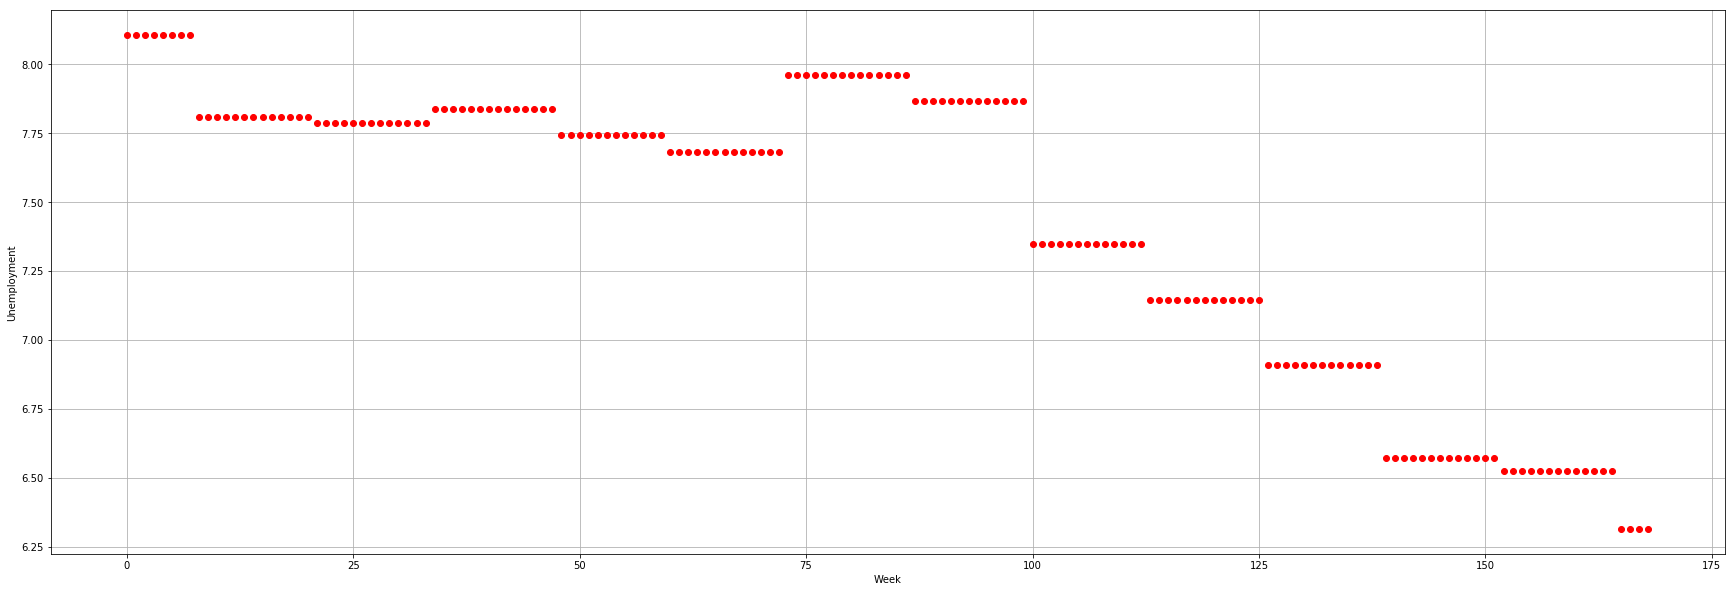

In [16]:
plt.plot(features[(features.Store==1)].Week, features[(features.Store==1)].Unemployment, 'ro')
plt.xlabel("Week")
plt.ylabel("Unemployment")
plt.grid()
plt.show()

In [17]:
train_features, test_features = train_test_split(features, test_size=0.3,random_state=42


In [38]:
print(train_features.shape,test_features.shape)

(5733, 9) (2457, 9)


In [25]:
X_train = train_features[['Temperature', 'Fuel_Price', 'Week', 'IsHoliday']]
y_train = train_features['Unemployment']

In [26]:
X_test = test_features[['Temperature', 'Fuel_Price', 'Week', 'IsHoliday']]
y_test = test_features['Unemployment']

In [20]:
np.isnan(features["Unemployment"])

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
8160    False
8161    False
8162    False
8163    False
8164    False
8165    False
8166    False
8167    False
8168    False
8169    False
8170    False
8171    False
8172    False
8173    False
8174    False
8175    False
8176    False
8177     True
8178     True
8179     True
8180     True
8181     True
8182     True
8183     True
8184     True
8185     True
8186     True
8187     True
8188     True
8189     True
Name: Unemployment, Length: 8190, dtype: bool

In [21]:
np.where(np.isnan(features["Unemployment"])) 

(array([ 169,  170,  171,  172,  173,  174,  175,  176,  177,  178,  179,
         180,  181,  351,  352,  353,  354,  355,  356,  357,  358,  359,
         360,  361,  362,  363,  533,  534,  535,  536,  537,  538,  539,
         540,  541,  542,  543,  544,  545,  715,  716,  717,  718,  719,
         720,  721,  722,  723,  724,  725,  726,  727,  897,  898,  899,
         900,  901,  902,  903,  904,  905,  906,  907,  908,  909, 1079,
        1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090,
        1091, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270,
        1271, 1272, 1273, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450,
        1451, 1452, 1453, 1454, 1455, 1625, 1626, 1627, 1628, 1629, 1630,
        1631, 1632, 1633, 1634, 1635, 1636, 1637, 1807, 1808, 1809, 1810,
        1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1989, 1990,
        1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
        2171, 2172, 2173, 2174, 2175, 

In [22]:
np.nan_to_num(features["Unemployment"])

array([8.106, 8.106, 8.106, ..., 0.   , 0.   , 0.   ])

In [32]:
features['IsHoliday'].isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
8160    False
8161    False
8162    False
8163    False
8164    False
8165    False
8166    False
8167    False
8168    False
8169    False
8170    False
8171    False
8172    False
8173    False
8174    False
8175    False
8176    False
8177    False
8178    False
8179    False
8180    False
8181    False
8182    False
8183    False
8184    False
8185    False
8186    False
8187    False
8188    False
8189    False
Name: IsHoliday, Length: 8190, dtype: bool

In [34]:
np.where(features["Unemployment"].values >= np.finfo(np.float64).max)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


(array([], dtype=int64),)

In [35]:
from sklearn import datasets, linear_model
features_Linear = linear_model.LinearRegression(normalize=True)
features_Linear.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').